# <center>MIE1624 – Introduction to Data Science and Analytics</center>

## <center>Assignment 3</center>


#### <center>Yunjie Xu 1008601951</center>    


In [116]:
from google.colab import files # google file

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords  

# using Textbolb libiary to do the spelling correction
import sys
!{sys.executable} -m pip install -U textblob
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer # Lemmatization
from nltk.stem import PorterStemmer # Stemming
import matplotlib.pyplot as plt
import itertools
import collections
from nltk.tokenize import MWETokenizer
from collections import Counter
from scipy.spatial.distance import euclidean
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.preprocessing import normalize
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
import sklearn.utils
from matplotlib.ticker import MaxNLocator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1. Data Collection and Cleaning
### 1.1 Load the dataset

In [16]:
# load the dataset

uploaded = files.upload()
df_A3 = pd.read_csv('webscraping_results_assignmnet3.csv')

Saving webscraping_results_assignmnet3.csv to webscraping_results_assignmnet3 (3).csv


In [17]:
df_A3.head()

,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions
0,Data Analyst,TOYO TIRES,"Ontario, CA",NaN,PostedPosted 2 days ago,NaN,Ability to understand data models and assist w...,https://www.indeed.com/company/Toyo/jobs/Data-...,Join the Toyo Tires Team!\nGREAT PEOPLE. GREAT...
1,Data Analyst (Remote),CoinTracker,"Remote in Ontario, CA",NaN,PostedPosted 9 days ago,NaN,Intake process created with a prioritized back...,https://www.indeed.com/rc/clk?jk=419f20a4a9be2...,CoinTracker makes cryptocurrency portfolio tra...
2,Reporting and Data Analyst,Monster Energy,"Corona, CA 92879",4.0,PostedPosted 30+ days ago,NaN,Assemble and analyze data for business reports...,https://www.indeed.com/rc/clk?jk=42829b392cebf...,"The Reporting & Data Analyst gathers, manages,..."
3,Human Resources Analyst,Inland Empire Utilities Agency,"Hybrid remote in Chino, CA 91708",4.2,PostedPosted 30+ days ago,"$99,094 - $120,736 a year",Additional paid floating holidays are availabl...,https://www.indeed.com/rc/clk?jk=a47b0bdeb9d6d...,THE POSITION:\n\n\nTHE OPPORTUNITY\nOur team i...
4,Healthcare Data Analyst I - Quality Systems,Inland Empire Health Plans,"Rancho Cucamonga, CA 91730",3.6,PostedPosted 14 days ago,"$79,810 - $101,774 a year",Responsible for understanding the various data...,https://www.indeed.com/rc/clk?jk=1c925f29c49df...,Position Summary/Position\n\nUnder the directi...


In [18]:
df_A3[0:1120]['Title'] = 'Data Analyst'
df_A3[1120:2231]['Title'] = 'Data Scientist'

# drop duplicate rows
df_A3 = df_A3.drop_duplicates(keep=False)

# reindex after remove duplicates
indexs = list(range(1,len(df_A3)+1))

df_A3 = pd.DataFrame(data=df_A3.values, 
                     columns= df_A3.columns,
                     index=indexs )

# drop columns which we do not need
df_A3 = df_A3.drop(['Company','Location','Rating','Date','Salary','Description','Links'],axis=1)

<ipython-input-18-2fec4198f869>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_A3[0:1120]['Title'] = 'Data Analyst'
<ipython-input-18-2fec4198f869>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_A3[1120:2231]['Title'] = 'Data Scientist'


In [19]:
df_A3.head()

,Title,Descriptions
1,Data Analyst,Join the Toyo Tires Team!\nGREAT PEOPLE. GREAT...
2,Data Analyst,CoinTracker makes cryptocurrency portfolio tra...
3,Data Analyst,"The Reporting & Data Analyst gathers, manages,..."
4,Data Analyst,THE POSITION:\n\n\nTHE OPPORTUNITY\nOur team i...
5,Data Analyst,Position Summary/Position\n\nUnder the directi...


In [20]:
'''
# load the dataset
# da
uploaded = files.upload()
df_da = pd.read_csv('2022-11-23_data analyst_Ontario.csv')
df_da['Title'] = 'Data Analyst'

# ds
uploaded = files.upload()
df_ds = pd.read_csv('2022-11-23_data scientist_USA.csv')
df_ds['Title'] = 'Data Scientist'

# combine two dataset
df_A3 = pd.concat([df_da,df_ds])
indexs = list(range(1,len(df_da)+len(df_ds)+1))
df_A3 = pd.DataFrame(data=df_A3.values, 
                     columns= df_A3.columns,
                     index=indexs )

# drop duplicate rows
df_A3 = df_A3.drop_duplicates(keep=False)

# reindex after remove duplicates
indexs = list(range(1,len(df_A3)+1))

df_A3 = pd.DataFrame(data=df_A3.values, 
                     columns= df_A3.columns,
                     index=indexs )

# drop columns which we do not need
df_A3 = df_A3.drop(['Company','Location','Rating','Date','Salary','Description','Links'],axis=1)

df_A3.head()
'''

"\n# load the dataset\n# da\nuploaded = files.upload()\ndf_da = pd.read_csv('2022-11-23_data analyst_Ontario.csv')\ndf_da['Title'] = 'Data Analyst'\n\n# ds\nuploaded = files.upload()\ndf_ds = pd.read_csv('2022-11-23_data scientist_USA.csv')\ndf_ds['Title'] = 'Data Scientist'\n\n# combine two dataset\ndf_A3 = pd.concat([df_da,df_ds])\nindexs = list(range(1,len(df_da)+len(df_ds)+1))\ndf_A3 = pd.DataFrame(data=df_A3.values, \n                     columns= df_A3.columns,\n                     index=indexs )\n\n# drop duplicate rows\ndf_A3 = df_A3.drop_duplicates(keep=False)\n\n# reindex after remove duplicates\nindexs = list(range(1,len(df_A3)+1))\n\ndf_A3 = pd.DataFrame(data=df_A3.values, \n                     columns= df_A3.columns,\n                     index=indexs )\n\n# drop columns which we do not need\ndf_A3 = df_A3.drop(['Company','Location','Rating','Date','Salary','Description','Links'],axis=1)\n\ndf_A3.head()\n"

### 1.2 Basic text preprocessing
#### 1.2.1 Lower casing

In [21]:
## Lower casing
df_A3["Descriptions"] = df_A3["Descriptions"] .apply(lambda x: x.lower())

#### 1.2.2 Remove all emojis

In [22]:
## Remove all emojis
def remove_emoji(text):
    text = text.encode('ascii', 'ignore').decode('ascii') #it encodes a unicode string to ascii and ignores errors
    return text

df_A3["Descriptions"] = df_A3["Descriptions"].apply(remove_emoji)

#### 1.2.3 Remove all URLs

In [23]:
## Remove all URLs
def remove_urls(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.(\w+)", "", text)
    return text

df_A3["Descriptions"] = df_A3["Descriptions"].apply(remove_urls)

#### 1.2.4 Remove all punctuations

In [24]:
## Remove all punctuations
def remove_punctuation(text):
    text = re.sub(r'[^\w\s]','',text)
    return text

df_A3['Descriptions'] = df_A3['Descriptions'].apply(remove_punctuation)

#### 1.2.5 Remove stopwords

In [25]:
## Remove stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df_A3['Descriptions'] = df_A3['Descriptions'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
df_A3.head()

,Title,Descriptions
1,Data Analyst,join toyo tires team great people great produc...
2,Data Analyst,cointracker makes cryptocurrency portfolio tra...
3,Data Analyst,reporting data analyst gathers manages interpr...
4,Data Analyst,position opportunity team dedicated improving ...
5,Data Analyst,position summaryposition direction quality sys...


## 2. Exploratory data analysis and feature engineering
### 2.1 Extract Skills
    I extract skills manually, selecting from the text frequencies table below.
    

In [27]:
df_skills = pd.DataFrame(  Counter(" ".join(df_A3['Descriptions']).split()).most_common(4000),
                           columns = ['Topic','Frequencies'])

pd.set_option('display.max_rows', None)
df_skills.head()

,Topic,Frequencies
0,data,14076
1,experience,7893
2,business,4605
3,work,4445
4,learning,3014


In [29]:
# soft 
soft_skill = ['communication','marketing','finance','leadership','collaboration','time management','business acumen','negotiation skills','consulting','creativity','presentation','research','curiosity','innovation','networks','generous','love','positive','talent','smart','integrity','organizations','efficiency','passion','diversity','benchmark','bright','porject management','courage','energetic','multitasking','hardworking','inquisitive']

# hard

# theory
theory = ['modeling','prediction','nlp','natural language processing','ml','machine learning','ai','artificial intelligence','database','data structure','algorithm','computer science','optimization','big data','web-scraping','statistics','regression','time series','supervised learning','unsupervised learning','experimental design','neural nets','hypothesis testing','tensorflow','distributed computing','cloud','visualization','mathematics','software development','High performance computing','hpc','augmented reality','rdbms','relational database management system','knn','k nearest neighbors','iot','internet of things','blockchain','cybersecurity','support vector machines','svm','mlops','olap','online analytical processing']

# tools
tools = ['r','sql','nosql','postgresql','sas','python','java','matlab','excel','aws','spark','azure','hadoop','power bi','tableau','spss','rpa','scikit','vba','visio','ggplot','qlik','jira','sklearn','julia','unix','erp','enterprise resource planning','sap','api','perl','javascript','airflow','xgboost','scipy','jupyter notebook','tensorflow','gcp','google cloud platform','linux','keras','pyspark','ssrs','pivot table']

hard_skill = theory + tools

topics = soft_skill + hard_skill

### 2.2/2.3 Feature Engineering

In [30]:
df_topics = df_A3.copy()

for item in topics:
    try:
        df_topics[item] = df_topics['Descriptions'].str.contains(item, na=False, case=False)
        df_topics[[item]] = df_topics[[item]].astype(int)
    except:
        pass

df_topics.head()

,Title,Descriptions,communication,marketing,finance,leadership,collaboration,time management,business acumen,negotiation skills,...,xgboost,scipy,jupyter notebook,gcp,google cloud platform,linux,keras,pyspark,ssrs,pivot table
1,Data Analyst,join toyo tires team great people great produc...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Data Analyst,cointracker makes cryptocurrency portfolio tra...,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Data Analyst,reporting data analyst gathers manages interpr...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Data Analyst,position opportunity team dedicated improving ...,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Data Analyst,position summaryposition direction quality sys...,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### 2.4 Visualize Key Information 
    1. The Worldcloud for Softskills

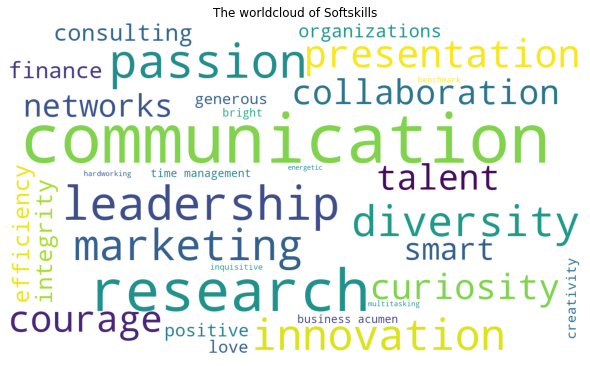

In [138]:
df_soft_skill = df_A3.copy()

for item in soft_skill:
    try:
        df_soft_skill[item] = df_soft_skill['Descriptions'].str.contains(item, na=False, case=False)
        df_soft_skill[[item]] = df_soft_skill[[item]].astype(int)
    except:
        pass

soft_skills = df_soft_skill.iloc[:,2:].sum()


wordcloud_softskill = WordCloud(width = 1200, height = 700, 
                                background_color ='white',
                                min_font_size = 10).fit_words(soft_skills) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8,6), facecolor = None) 
plt.imshow(wordcloud_softskill) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('The worldcloud of Softskills')
plt.savefig('f1.png',transparent = True)
plt.show()

      2. The Worldcloud for Hardskills

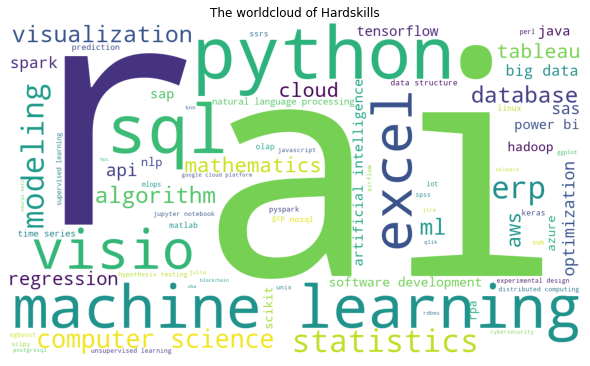

In [141]:
df_hard_skill = df_A3.copy()

for item in hard_skill:
    try:
        df_hard_skill[item] = df_hard_skill['Descriptions'].str.contains(item, na=False, case=False)
        df_hard_skill[[item]] = df_hard_skill[[item]].astype(int)
    except:
        pass

hard_skills = df_hard_skill.iloc[:,2:].sum()


wordcloud_hardskill = WordCloud(width = 1200, height = 700, 
                                background_color ='white',
                                min_font_size = 10).fit_words(hard_skills) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8,6), facecolor = None) 
plt.imshow(wordcloud_hardskill) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('The worldcloud of Hardskills')
plt.savefig('f4.png',transparent = True)
plt.show()

     3. The Worldcloud for All Skills

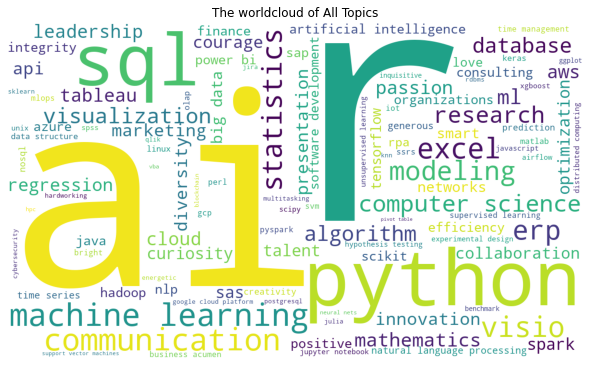

In [142]:
df_skill = df_A3.copy()

for item in topics:
    try:
        df_skill[item] = df_skill['Descriptions'].str.contains(item, na=False, case=False)
        df_skill[[item]] = df_skill[[item]].astype(int)
    except:
        pass

all_topics = df_skill.iloc[:,2:].sum()


wordcloud_all_topics = WordCloud(width = 1200, height = 700, 
                                background_color ='white',
                                min_font_size = 10).fit_words(all_topics) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8,6), facecolor = None) 
plt.imshow(wordcloud_all_topics) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('The worldcloud of All Topics')
plt.savefig('f5.png',transparent = True)
plt.show()

      4. The Worldcloud of Skills for Data Scientists

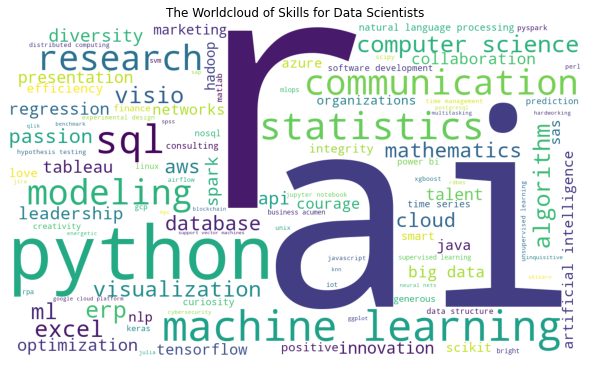

In [143]:
df_A3_DS = df_A3[df_A3['Title'] == 'Data Scientist']


df_skill = df_A3_DS.copy()

for item in topics:
    try:
        df_skill[item] = df_skill['Descriptions'].str.contains(item, na=False, case=False)
        df_skill[[item]] = df_skill[[item]].astype(int)
    except:
        pass

all_topics = df_skill.iloc[:,2:].sum()


wordcloud_all_topics = WordCloud(width = 1200, height = 700, 
                                background_color ='white',
                                min_font_size = 10).fit_words(all_topics) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8,6), facecolor = None) 
plt.imshow(wordcloud_all_topics) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('The Worldcloud of Skills for Data Scientists')
plt.savefig('f6.png',transparent = True)
plt.show()

     5. The Worldcloud of Skills for Data Analyst

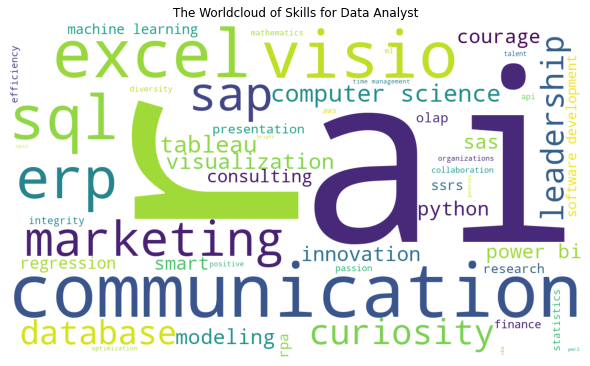

In [144]:
df_A3_DA = df_A3[df_A3['Title'] == 'Data Analyst']


df_skill = df_A3_DA.copy()

for item in topics:
    try:
        df_skill[item] = df_skill['Descriptions'].str.contains(item, na=False, case=False)
        df_skill[[item]] = df_skill[[item]].astype(int)
    except:
        pass

all_topics_DA = df_skill.iloc[:,2:].sum()


wordcloud_all_topics = WordCloud(width = 1200, height = 700, 
                                background_color ='white',
                                min_font_size = 10).fit_words(all_topics_DA) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8,6), facecolor = None) 
plt.imshow(wordcloud_all_topics) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('The Worldcloud of Skills for Data Analyst')
plt.savefig('f7.png',transparent = True)
plt.show()

     6. Pie Chart

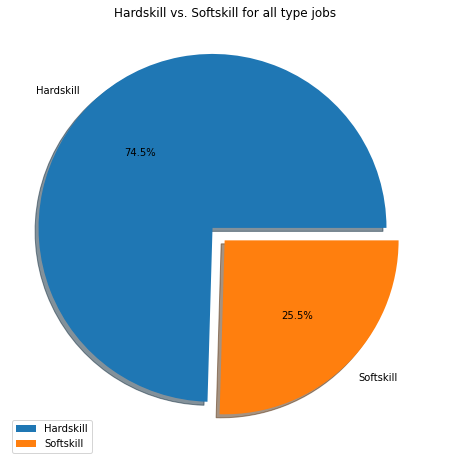

In [139]:
Pie_hardskill = sum(hard_skills.values)
Pie_softskill = sum(soft_skills.values)

y = np.array([Pie_hardskill, Pie_softskill])
mylabels = ["Hardskill", "Softskill"]
myexplode = [0.1, 0]

plt.figure(figsize = (10, 8), facecolor = None) 
plt.pie(y, labels = mylabels, explode = myexplode, shadow = True,autopct='%1.1f%%')
plt.title('Hardskill vs. Softskill for all type jobs')
plt.legend()
plt.savefig('f2.png',transparent = True)
plt.show() 

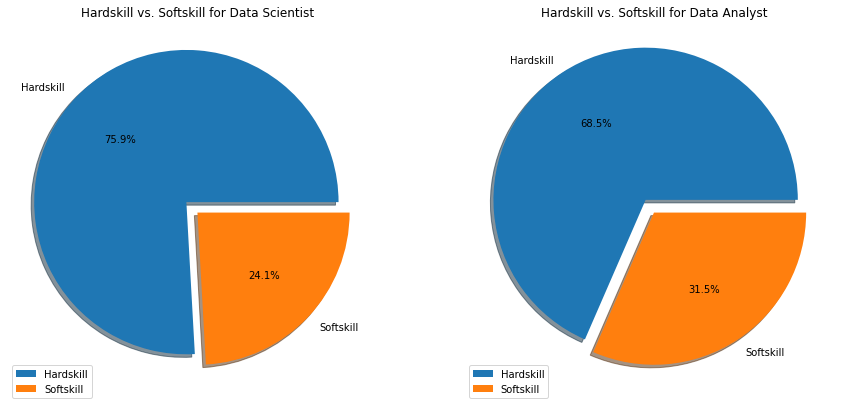

In [140]:
# hard for ds
df_hard_ds = df_A3_DS.copy()

for item in hard_skill:
    try:
        df_hard_ds[item] = df_hard_ds['Descriptions'].str.contains(item, na=False, case=False)
        df_hard_ds[[item]] = df_hard_ds[[item]].astype(int)
    except:
        pass

hard_ds = df_hard_ds.iloc[:,2:].sum()
Pie_hardskill_ds = sum(hard_ds.values)

# soft for ds
df_soft_ds = df_A3_DS.copy()

for item in soft_skill:
    try:
        df_soft_ds[item] = df_soft_ds['Descriptions'].str.contains(item, na=False, case=False)
        df_soft_ds[[item]] = df_soft_ds[[item]].astype(int)
    except:
        pass

soft_ds = df_soft_ds.iloc[:,2:].sum()
Pie_softskill_ds = sum(soft_ds.values)


# hard for da
df_hard_da = df_A3_DA.copy()

for item in hard_skill:
    try:
        df_hard_da[item] = df_hard_da['Descriptions'].str.contains(item, na=False, case=False)
        df_hard_da[[item]] = df_hard_da[[item]].astype(int)
    except:
        pass

hard_da = df_hard_da.iloc[:,2:].sum()
Pie_hardskill_da = sum(hard_da.values)

# soft for da
df_soft_da = df_A3_DA.copy()

for item in soft_skill:
    try:
        df_soft_da[item] = df_soft_da['Descriptions'].str.contains(item, na=False, case=False)
        df_soft_da[[item]] = df_soft_da[[item]].astype(int)
    except:
        pass

soft_da = df_soft_da.iloc[:,2:].sum()
Pie_softskill_da = sum(soft_da.values)



y_ds = np.array([Pie_hardskill_ds, Pie_softskill_ds])
y_da = np.array([Pie_hardskill_da, Pie_softskill_da])
mylabels = ["Hardskill", "Softskill"]
myexplode = [0.1, 0]


plt.figure(figsize = (15, 8), facecolor = None) 

# subplot_1
plt.subplot(121)
plt.pie(y_ds, labels = mylabels, explode = myexplode, shadow = True,autopct='%1.1f%%')
plt.title('Hardskill vs. Softskill for Data Scientist')
plt.legend()

# subplot_2
plt.subplot(122)
plt.pie(y_da, labels = mylabels, explode = myexplode, shadow = True,autopct='%1.1f%%')
plt.title('Hardskill vs. Softskill for Data Analyst')
plt.legend()

plt.savefig('f3.png',transparent = True)
plt.show() 


## 3.  Hierarchical Clustering Implementation
#### 3.1 create new features based on combining relative topics

In [38]:
# feature_1 Statistical Analysis

#df_topics['Statistical Learning'] = df_topics['regression'] + df_topics['statistics'] + df_topics['time series'] + df_topics['experimental design']+df_topics['supervised learning']+df_topics['unsupervised learning']+df_topics['hypothesis testing']
#df_topics = df_topics.drop(['regression','statistics','time series','experimental design','unsupervised learning','supervised learning','hypothesis testing'],axis=1)                                
                                              
# feature_1 Statistical Analysis

df_topics['Statistical Learning'] = df_topics['regression'] + df_topics['time series'] + df_topics['experimental design']+df_topics['supervised learning']+df_topics['unsupervised learning']+df_topics['hypothesis testing'] + df_topics['mathematics'] + df_topics['knn'] + df_topics['k nearest neighbors']
df_topics = df_topics.drop(['regression','time series','experimental design','unsupervised learning','supervised learning','hypothesis testing','mathematics','knn','k nearest neighbors'],axis=1)                                
                                              

In [39]:
# feature_2 Modeling Technology
df_topics['Modeling Technology'] = df_topics['modeling'] + df_topics['prediction']
df_topics = df_topics.drop(['modeling','prediction'],axis=1)


In [40]:
# feature_3 SQL
df_topics['SQL'] = df_topics['sql'] + df_topics['nosql'] + df_topics['postgresql'] + df_topics['ssrs'] + df_topics['rdbms']
df_topics = df_topics.drop(['sql','nosql','postgresql','ssrs','rdbms'],axis=1)


In [41]:
# feature_4
df_topics['Team Sprit'] = df_topics['collaboration']  + df_topics['time management'] + df_topics['presentation']+ df_topics['innovation']+ df_topics['creativity'] + df_topics['curiosity'] +df_topics['leadership'] 
df_topics = df_topics.drop(['collaboration','time management','presentation','innovation','creativity','curiosity','leadership'],axis=1)


In [42]:
# feature_5
df_topics['Commerce Skills'] = df_topics['finance'] + df_topics['marketing'] + df_topics['business acumen'] + df_topics['consulting'] + df_topics['negotiation skills']
df_topics = df_topics.drop(['finance','marketing','business acumen','consulting','negotiation skills'],axis=1)


In [43]:
# feature_6
# df_topics['Computing Skills'] = df_topics['computer science'] + df_topics['data structure'] + df_topics['algorithm'] + df_topics['optimization']

# df_topics['Data Structure and Algorithm'] = df_topics['data structure'] + df_topics['algorithm'] + df_topics['optimization']

df_topics['Data Structure and Algorithm'] = df_topics['data structure'] + df_topics['algorithm'] + df_topics['computer science'] 

# df_topics = df_topics.drop(['computer science','data structure','algorithm','optimization'],axis=1)
# df_topics = df_topics.drop(['data structure','algorithm','optimization'],axis=1)

df_topics = df_topics.drop(['data structure','algorithm','computer science'],axis=1)

In [44]:
# feature_7
df_topics['Big data'] = df_topics['big data'] + df_topics['web-scraping'] + df_topics['distributed computing']
df_topics = df_topics.drop(['big data','web-scraping','distributed computing'],axis=1)


In [45]:
# feature_8
#df_topics['Machine Learning'] = df_topics['ml'] + df_topics['machine learning'] 
df_topics = df_topics.drop(['ml','machine learning'],axis=1)


In [46]:
# feature_9
df_topics['Deep Learning'] = df_topics['neural nets'] + df_topics['nlp'] + df_topics['natural language processing'] + df_topics['tensorflow'] + df_topics['ai']+ df_topics['artificial intelligence']
df_topics = df_topics.drop(['neural nets','nlp','natural language processing','tensorflow','ai','artificial intelligence'],axis=1)


In [47]:
# feature_10
df_topics['Cloud Computing'] = df_topics['azure'] + df_topics['aws'] + df_topics['gcp'] + df_topics['google cloud platform'] + df_topics['cloud']
df_topics = df_topics.drop(['azure','aws','gcp','google cloud platform','cloud'],axis=1)

In [48]:
# feature_11 R
df_topics['R'] = df_topics['r'] + df_topics['ggplot']
df_topics = df_topics.drop(['r','ggplot'],axis=1)

In [49]:
# feature_12 Python
df_topics['Python'] = df_topics['python'] +  df_topics['scikit'] + df_topics['pyspark'] + df_topics['sklearn'] + df_topics['keras'] + df_topics['xgboost'] + df_topics['api'] + df_topics['support vector machines'] + df_topics['scipy'] + df_topics['svm']
df_topics = df_topics.drop(['python','scikit','pyspark','keras','xgboost','api','support vector machines','sklearn','scipy','svm'],axis=1)

In [50]:
# feature_13 Excel
df_topics['Excel'] = df_topics['excel'] +  df_topics['vba'] + df_topics['pivot table']
df_topics = df_topics.drop(['excel','vba','pivot table'],axis=1)

In [51]:
# df_topics = df_topics.drop([],axis=1)

In [52]:
pd.set_option('display.max_columns', None)
df_p3 = df_topics.drop(['Title','Descriptions'],axis=1)
df_p3.head()

,communication,research,networks,generous,love,positive,talent,smart,integrity,organizations,efficiency,passion,diversity,benchmark,bright,porject management,courage,energetic,multitasking,hardworking,inquisitive,database,optimization,statistics,visualization,software development,High performance computing,hpc,augmented reality,relational database management system,iot,internet of things,blockchain,cybersecurity,mlops,olap,online analytical processing,sas,java,matlab,spark,hadoop,power bi,tableau,spss,rpa,visio,qlik,jira,julia,unix,erp,enterprise resource planning,sap,perl,javascript,airflow,jupyter notebook,linux,Statistical Learning,Modeling Technology,SQL,Team Sprit,Commerce Skills,Data Structure and Algorithm,Big data,Deep Learning,Cloud Computing,R,Python,Excel
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,1,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
4,1,1,0,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,1,1,0,1
5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,0,1,0,1,0,1,0,1


    Then I drop features (soft skills feature) which hard for make courses and not-common skills 

In [53]:
df_p3 = df_p3.drop(['online analytical processing','porject management','internet of things','enterprise resource planning',
                    'relational database management system','augmented reality','High performance computing','hpc','blockchain',
                    'energetic','julia','cybersecurity','qlik', 'hardworking','multitasking','jira','benchmark','inquisitive',
                    'unix','spss','jupyter notebook','airflow','perl','iot','mlops','bright','linux','olap','matlab','generous',
                    'rpa','love','positive','organizations','efficiency','integrity','software development','sap','talent','courage',
                    'diversity','passion','javascript','networks','smart'],axis=1)

In [54]:
df_p3.astype(bool).sum(axis=0).sort_values(ascending= False)

R                               1452
Deep Learning                   1388
Python                          1058
Team Sprit                       905
SQL                              864
communication                    820
Data Structure and Algorithm     810
visio                            697
Excel                            697
Statistical Learning             671
statistics                       653
Modeling Technology              651
erp                              637
research                         582
Cloud Computing                  538
Commerce Skills                  520
visualization                    502
database                         472
tableau                          337
optimization                     246
sas                              243
Big data                         235
spark                            235
power bi                         166
java                             163
hadoop                           151
dtype: int64

#### 3.2 Implement hierarchical clustering algorithm

In [55]:
list_skill = df_p3.columns

D = np.zeros([len(list_skill),len(list_skill)])

for num in range(1,len(df_p3)+1) :
    
    nTemp = normalize(np.matrix(df_p3.loc[[num]]), axis=1)
    nTemp = nTemp[0] # convert to 1D array
    
    # empty matrix is fill
    D_i = np.zeros([nTemp.size,nTemp.size])
    
    # Find all element wise temp differences
    for i in range(nTemp.size):
        for j in range(nTemp.size):
            D_i[i,j] = abs(nTemp[i]-nTemp[j])
    
    D = D + D_i

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn

In [56]:
Y = sch.linkage(D, method='single', metric='euclidean')

<ipython-input-56-b1ceebbcabfd>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = sch.linkage(D, method='single', metric='euclidean')


#### 3.4 Generate and plot a dendrogram

[]

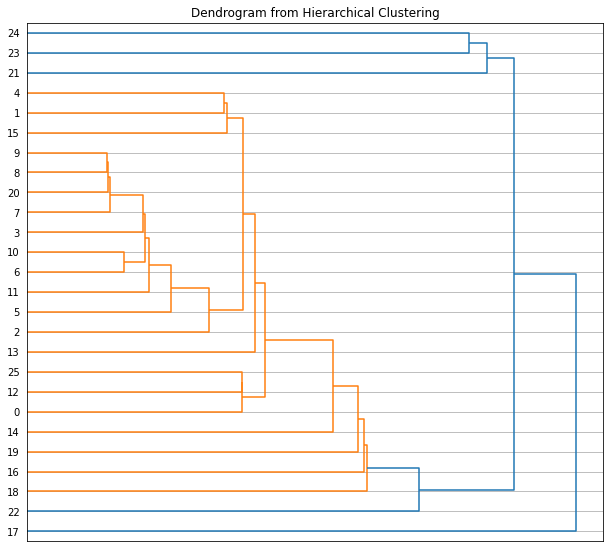

In [57]:
fig = plt.figure(figsize=(20,12))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])


Z1 = sch.dendrogram(Y, orientation = 'right')

ax1.set_xticks([])
#ax1.set_yticklabels(label_list)

plt.title('Dendrogram from Hierarchical Clustering')
plt.grid()
plt.plot() # supress prints

In [58]:
index = [17,22,18,16,19,14,0,12,25,13,2,5,11,6,10,3,7,20,8,9,15,1,4,21,23,24]
labels = list_skill
label_list = []
for i in index:
    label_list.append(labels[i])

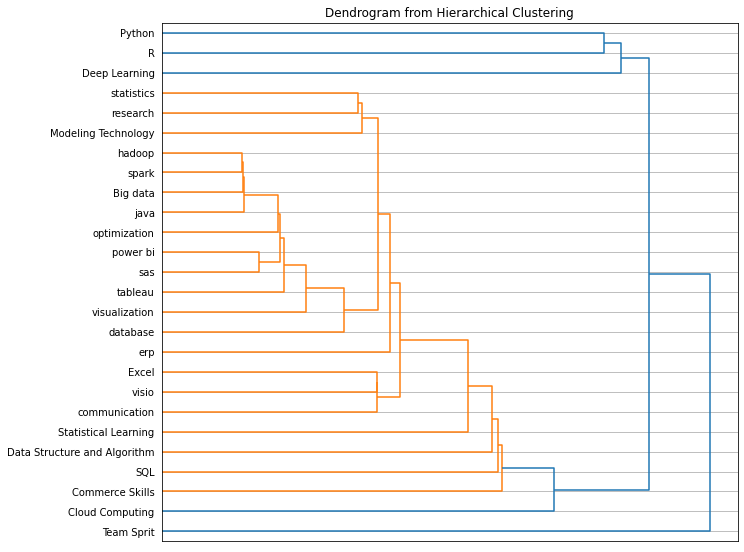

In [146]:
fig = plt.figure(figsize=(20,12))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])


Z1 = sch.dendrogram(Y, orientation = 'right')

ax1.set_xticks([])
ax1.set_yticklabels(label_list)

plt.title(')
plt.grid()
plt.plot() # supress prints
plt.savefig('f8.png',transparent = True)
plt.show()

- **Course 1** : Introduction to Statistical Programming based on R/Python
- **Course 2** : Introduction to Deep Learning in R/Python

In [60]:
list_skill[[24,23,21]]

Index(['Python', 'R', 'Deep Learning'], dtype='object')

- **Course 3** : Advanced Statistics for Data Science
- **Course 4** : Introduction to Statistical Modeling

In [61]:
list_skill[[4,1,15]]

Index(['statistics', 'research', 'Modeling Technology'], dtype='object')

- **Course 5** : Introduction to Big Data with Spark and Hadoop
- **Course 6** : Advanced Big Data with Java

In [62]:
list_skill[[9,8,20,7]]

Index(['hadoop', 'spark', 'Big data', 'java'], dtype='object')

- **Course 7** : Business Intelligence in Power BI/SAS

In [63]:
list_skill[[10,6]]

Index(['power bi', 'sas'], dtype='object')

- **Course 8** : Business Practice in Excel/Visio

In [64]:
list_skill[[25,12,0]]

Index(['Excel', 'visio', 'communication'], dtype='object')

- **Course 9** : SQL for Data Science

In [65]:
list_skill[[16]]

Index(['SQL'], dtype='object')

- **Course 10** : Building High-Performing Teams and Running Business


In [66]:
list_skill[[18,17]]

Index(['Commerce Skills', 'Team Sprit'], dtype='object')

## 4.K-means or DBSCAN clustering implementation:
#### 4.1 Implement k-means clustering algorithm or DBSCAN clustering algorithm

In [148]:
model_k1 = KMeans(n_clusters=12)
clusters = model_k1.fit_predict(D)
clusters

array([ 2,  6,  6,  0,  6,  6,  0,  0,  0,  0,  0,  0,  2,  6,  3,  6, 11,
        5, 10,  9,  0,  7,  4,  1,  8,  2], dtype=int32)

-**Course 1**: Big Data Science with Mutiple Tools

In [149]:
Kmc10_1 = list_skill[[3,6,7,8,9,10,20]]
print(Kmc10_1)

Index(['optimization', 'sas', 'java', 'spark', 'hadoop', 'power bi',
       'Big data'],
      dtype='object')


-**Course 2**: Introduction to Statistical Porgramming: R

In [150]:
Kmc10_2 = [list_skill[23]]
print(Kmc10_2)

['R']


-**Course 3**: Business with Advanced Excel,SQL,and Visio

In [151]:
Kmc10_3 = list_skill[[0,12,25]]
print(Kmc10_3)

Index(['communication', 'visio', 'Excel'], dtype='object')


-**Course 4**: Introduction to Statistical Learning

In [152]:
Kmc10_4 = list_skill[14]
print(Kmc10_4)

Statistical Learning


-**Course 5**: Cloud Practitioner Essentials

In [154]:
Kmc10_5 = list_skill[22]
print(Kmc10_5)

Cloud Computing


-**Course 6**: Advanced Statistics and Modeling Technology in Data Science

In [156]:
Kmc10_6 = list_skill[[1,2,4,5,13,15]]
print(Kmc10_6)

Index(['research', 'database', 'statistics', 'visualization', 'erp',
       'Modeling Technology'],
      dtype='object')


-**Course 7**: Building High-Performing Teams

In [161]:
Kmc10_7 = list_skill[17]
print(Kmc10_7)

Team Sprit


-**Course 8**: Introduction to Deep Learning

In [162]:
Kmc10_8 = list_skill[21]
print(Kmc10_8)

Deep Learning


-**Course 9**: Introduction to Statistical Porgramming: Python

In [163]:
Kmc10_9 = list_skill[24]
print(Kmc10_9)

Python


-**Course 10**: Introduction to Data Structure and Algorithm

In [164]:
Kmc10_10 = list_skill[19]
print(Kmc10_10)

Data Structure and Algorithm


-**Course 11**: Foundations of Commerce

In [165]:
Kmc10_11 = list_skill[18]
print(Kmc10_11)

Commerce Skills


-**Course 12**: SQL for Data Science

In [166]:
Kmc10_12 = list_skill[16]
print(Kmc10_12)

SQL


#### 4.2 Decide about a number of clusters

In [121]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(5, 25)
  
for k in K:

    kmeanModel = KMeans(n_clusters=k,algorithm = 'elkan').fit(D)
    kmeanModel.fit(D)
  
    distortions.append(sum(np.min(cdist(D, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / 25)
    inertias.append(kmeanModel.inertia_)
  

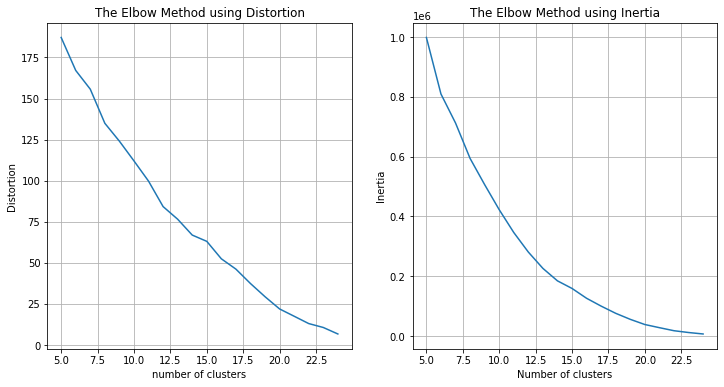

In [147]:


plt.figure(figsize = (12, 6), facecolor = None) 

# subplot_1
plt.subplot(121)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(K, distortions)
plt.xlabel('number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.grid()

# subplot_1
plt.subplot(122)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(K, inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.grid()
plt.savefig('f9.png',transparent = True)
plt.show()

## 5. Interpretation of results, discussion and final course curriculum 

In the K-means clustering, the project has too many skills, which could make the project design more challenging, and it is also hard for students to properly absorb the abilities they should obtain in one or two semesters. Besides, the course curricula built from hierarchical clustering may better identify business and technical skills and give a curriculum containing both business and technical stream courses. Those two streams of courses supplied can better agree with the program's need to focus on technical and soft skills.

** Please Go My Report Appendix to See My Visualize Course Curriculum **